In [1]:
import pandas as pd

In [2]:
covidData = pd.read_csv("../../database/dadosSP22.csv", on_bad_lines='skip')

/home/wallece/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (2,13,20,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#Visualizando Dados
covidData.head()
covidData.shape

(652852, 28)

# Verificando e Selecionando as Colunas

In [4]:
#Verificando a dimensão da Tabela
colunas = covidData.columns
colunas

Index(['id', 'estadoNotificacao', 'estadoNotificacaoIBGE',
       'municipioNotificacao', 'municipioNotificacaoIBGE', 'profissionalSaude',
       'profissionalSeguranca', 'cbo', 'sexo', 'racaCor', 'estado',
       'estadoIBGE', 'municipio', 'municipioIBGE', 'dataNotificacao',
       'sintomas', 'outrosSintomas', 'dataInicioSintomas', 'condicoes',
       'estadoTeste', 'dataTeste', 'tipoTeste', 'resultadoTeste',
       'classificacaoFinal', 'evolucaoCaso', 'dataEncerramento', 'cnes',
       'idade'],
      dtype='object')

In [7]:
# Visualizando o formato das condições
covidData['condicoes'].value_counts()

Doenças cardíacas crônicas                                                                                                                         19619
Doenças respiratórias crônicas descompensadas                                                                                                      13837
Diabetes                                                                                                                                            9604
Outros                                                                                                                                              3345
Doenças cardíacas crônicas, Diabetes                                                                                                                3069
                                                                                                                                                   ...  
Gestante, Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5)           

In [5]:
# Separando as colunas mais importantes
colunasImportantes = ['id', 'sexo', 'racaCor', 'idade', 'sintomas', 'condicoes',
                      'resultadoTeste', 'evolucaoCaso']
covidData = covidData[colunasImportantes]

# Calculando e Removendo os Valores Ausentes

In [29]:
#Verificando a quantidade de dados faltantes por colunas
from matplotlib import pyplot as plt

def visualizarQntFaltosos(covidData):
    faltantes = covidData.isnull().sum()
    faltantes_percentual = (covidData.isnull().sum() / len(covidData['id'])) * 100
    return faltantes_percentual
    
def plotarQntFaltosos(dados):
    nomes = dados.index
    valores = dados.values
    plt.barh(nomes, valores)
    plt.show

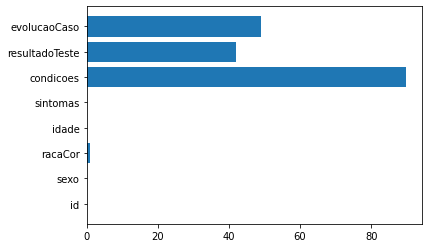

In [30]:
dados_faltosos = visualizarQntFaltosos(covidData)
plotarQntFaltosos(dados_faltosos)

# Limpeza de Dados - Atibuto Evolução

#### i. Pode conter (Cancelado, Cura, Ignorado, Em tratamento domiciliar, Óbito, Internado, Internado em UTI
#### ii. Inicialmente, serão removido os valore ausentes
#### iii. Em seguida, os valores Cancelado e Ignorado serão removidos

In [37]:
#Salvando todos os dados que não possuem a evolução vazia
alvo = 'evolucaoCaso'
newData = covidData.loc[covidData[alvo].notnull()]

In [32]:
#Visualizando as novas dimensões dos novos dados
newData.shape

(332250, 8)

In [34]:
visualizarQntFaltosos(newData)

id                 0.000000
sexo               0.001806
racaCor            1.246953
idade              0.001806
sintomas           0.004214
condicoes         89.121746
resultadoTeste    26.618811
evolucaoCaso       0.000000
dtype: float64

In [36]:
# Os valores - Ignorado e Cancelado devem ser removidos
# newData[alvo].value_counts()
newData[alvo].unique()

array(['Cancelado', 'Cura', 'Ignorado', 'Em tratamento domiciliar',
       'Óbito', 'Internado', 'Internado em UTI'], dtype=object)

In [61]:
#Verificando quantos casos foram óbitos e recuperados

newDData = newData.drop(newData[newData[alvo] == 'Ignorado'].index);
newDData = newData.drop(newData[newData[alvo] == 'Cancelado'].index);

newDData[alvo].value_counts()
# newDData.shape

#newDData['EVOLUCAO'].replace(1, 'OBITO', inplace = True);

TypeError: unhashable type: 'Series'

In [42]:
#Eliminando os atributos vazios
covidNewData = newDData.loc[newDData['CLASSI_FIN'].notnull()]
covidNewData.shape

(1120, 165)

In [43]:
covidNewData['CLASSI_FIN'].value_counts()

5.0    762
4.0    350
1.0      3
3.0      3
2.0      2
Name: CLASSI_FIN, dtype: int64

# Coletando os Sintomas

# Organizando as Comorbidades
#### 

In [46]:
# Comorbidades
comorbidades = {"diabetes": 'Diabetes', 
                "obesidade": 'Obesidade', 
                "renal": 'Doenças renais crônicas em estágio avançado',
                "respiratoria": 'Doenças respiratórias crônicas descompensadas',
                "imunossupressao": 'Imunossupressão',
                "fragilidadeImuno": 'Portador de doenças cromossômicas ou estado de fragilidade imunológica',
                "gestante": 'Gestante',
                "cardiaca": 'Doenças cardíacas crônicas',
                "puerpera": 'Puérpera'}

x = comorbidades.keys()


# stringX = 'Doenças cardíacas crônicas, Diabetes'
# comorbidades['diabetes'] in stringX

In [ ]:
for chave in comorbidades.keys():
    print(chave)

In [45]:
# Substituindo o valor das comorbidades
covidNewData.loc[covidNewData.FATOR_RISC == 2, ["PUERPERA", "CARDIOPATI", "HEMATOLOGI",
            "SIND_DOWN", "HEPATICA", "ASMA","DIABETES", "NEUROLOGIC", "PNEUMOPATI",
            "IMUNODEPRE", "RENAL", "OBESIDADE"]] = 2;
covidNewData.RENAL.value_counts()

/home/wallece/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


2.0    424
1.0     53
Name: RENAL, dtype: int64

In [46]:
covidNewData.shape

(1120, 165)

In [47]:
newCovidData = covidNewData.drop(covidNewData[covidNewData.CLASSI_FIN != 5].index, inplace = False)
#covidNewData.shape
newCovidData.shape

(762, 165)

In [48]:
#Filtrando os atributos
attributes = ["CS_SEXO", "NU_IDADE_N", "CS_RACA", "SURTO_SG", "FEBRE", "TOSSE", "GARGANTA", 
              "DISPNEIA", "DESC_RESP", "SATURACAO", "DIARREIA","VOMITO", "FATOR_RISC", "PUERPERA", "CARDIOPATI", 
              "HEMATOLOGI", "SIND_DOWN", "HEPATICA", "ASMA", "DIABETES", "NEUROLOGIC","PNEUMOPATI",
              "IMUNODEPRE", "RENAL", "OBESIDADE", "DT_INTERNA", "DT_EVOLUCA", "CLASSI_FIN", "SUPORT_VEN", "UTI"]
# 'EVOLUCAO'

dbCovid = newCovidData[attributes];
dbCovid.shape

(762, 30)

In [49]:
write = pd.ExcelWriter('uti_dados_pp_Jan2021.xlsx')
dbCovid.to_excel(write, 'dados', index = False)
write.save()

In [47]:
# Lista de Comorbidades
"""
Diabetes
Obesidade
Doenças renais crônicas em estágio avançado (graus 3, 4 e 5)
Doenças respiratórias crônicas descompensadas 
Imunossupressão
Portador de doenças cromossômicas ou estado de fragilidade imunológica
Gestante
Doenças cardíacas crônicas 
Puérpera (até 45 dias do parto)
"""

'\nDiabetes\nObesidade\nDoenças renais crônicas em estágio avançado (graus 3, 4 e 5)\nDoenças respiratórias crônicas descompensadas \nImunossupressão\nPortador de doenças cromossômicas ou estado de fragilidade imunológica\nGestante\nDoenças cardíacas crônicas \nPuérpera (até 45 dias do parto)\n'